<a href="https://colab.research.google.com/github/saurab1994/Python_project/blob/main/Housing_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
# loading relevent library and dataset
import matplotlib.pyplot as plt
import pandas as pd
path =r'/content/kc_house_data.csv'
df =pd.read_csv(path)
pd.set_option('display.max_columns',None)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


#EDA ANALYSIS

In [27]:
# no null values in the dataset
# all except date are numerical column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [28]:
# removing the id and date column from the data as no information contained influencing the house price
df.drop(['id','date'],axis =1,inplace  =True)

In [30]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [34]:
# 8 point summery for the numerical datatype excluding 'yr_built', 'yr_renovated','lat', 'long'
exclude=['yr_built', 'yr_renovated','lat', 'long']
df.loc[:,~df.columns.isin(exclude)].describe().T

,count,mean,std,min,25%,50%,75%,max
price,21613.0,540088.141767,367127.196483,75000.0,321950.00,450000.00,645000.0,7700000.0
bedrooms,21613.0,3.370842,0.930062,0.0,3.00,3.00,4.0,33.0
bathrooms,21613.0,2.114757,0.770163,0.0,1.75,2.25,2.5,8.0
sqft_living,21613.0,2079.899736,918.440897,290.0,1427.00,1910.00,2550.0,13540.0
sqft_lot,21613.0,15106.967566,41420.511515,520.0,5040.00,7618.00,10688.0,1651359.0
floors,21613.0,1.494309,0.539989,1.0,1.00,1.50,2.0,3.5
waterfront,21613.0,0.007542,0.086517,0.0,0.00,0.00,0.0,1.0
view,21613.0,0.234303,0.766318,0.0,0.00,0.00,0.0,4.0
condition,21613.0,3.409430,0.650743,1.0,3.00,3.00,4.0,5.0
grade,21613.0,7.656873,1.175459,1.0,7.00,7.00,8.0,13.0


In [41]:
continuous_columns =['price',  'sqft_living', 'sqft_lot', 'sqft_above','sqft_basement','sqft_living15', 'sqft_lot15']
len(continuous_columns)

7

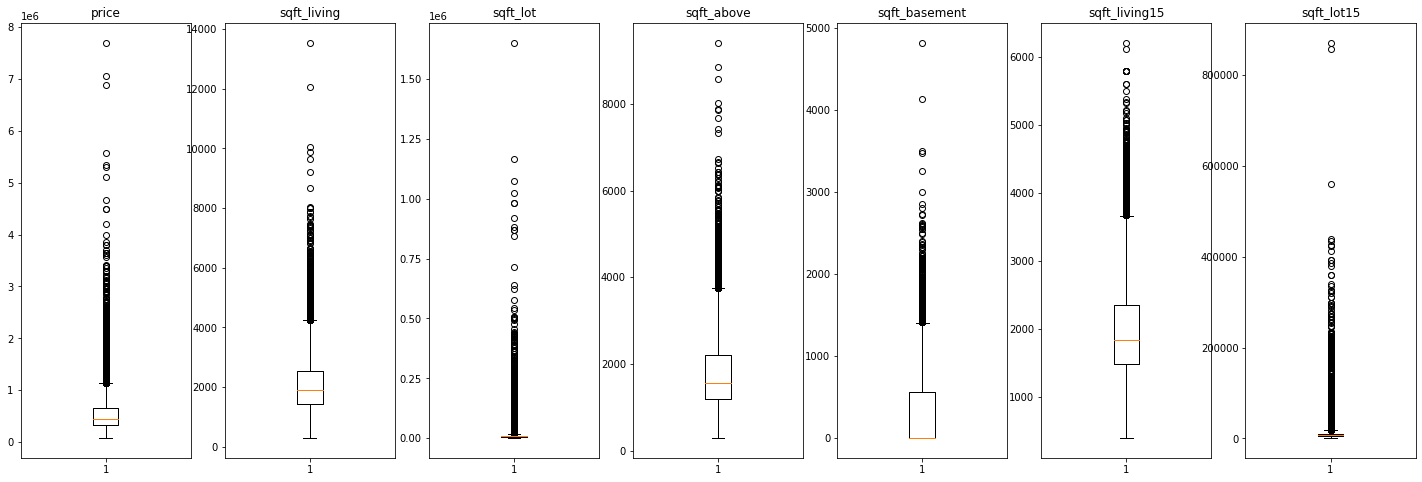

In [75]:
i=0
fig,axes =plt.subplots(nrows =1,ncols =7,figsize=(25,8))
axes =axes.ravel()
for ax in axes:
  ax.boxplot(x=df[continuous_columns[i]])
  ax.set_title(continuous_columns[i])
  i+=1
plt.show()  

In [45]:
discrete_columns =['bedrooms', 'bathrooms','floors','waterfront', 'condition', 'grade', 'zipcode', 'yr_built', 'view']
len(discrete_columns)

9

In [65]:
import numpy as np
df['bathrooms'] = df['bathrooms'].apply(np.ceil)
df['floors'] = df['floors'].apply(np.ceil)

In [76]:
for i in discrete_columns:
  print(df[i].value_counts())
  print(' ')


3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64
 
3.0    9365
2.0    6433
1.0    3928
4.0    1611
5.0     223
6.0      33
0.0      10
7.0       6
8.0       4
Name: bathrooms, dtype: int64
 
1.0    10680
2.0    10151
3.0      774
4.0        8
Name: floors, dtype: int64
 
0    21450
1      163
Name: waterfront, dtype: int64
 
3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64
 
7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: grade, dtype: int64
 
98103    602
98038    590
98115    583
98052    574
98117    553
        ... 
98102    105
98010    100
98024     81
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64
 
2014    559
2006    454
2005    450
2004    433
2003    422
       ... 
1933     30
1901     29
1902     27
1935     2

In [87]:
# there are 13 houses with 0 bedrooms which has to be removed from data as there has to a atleast one bedroom in a house
df.drop(df[df['bedrooms']==0].index,axis=0,inplace=True)

In [88]:
# also removing the entries with bedrooms >=8 as they reprent a small data with outling features
df.drop(df[df['bedrooms']>=8].index,axis=0,inplace=True)

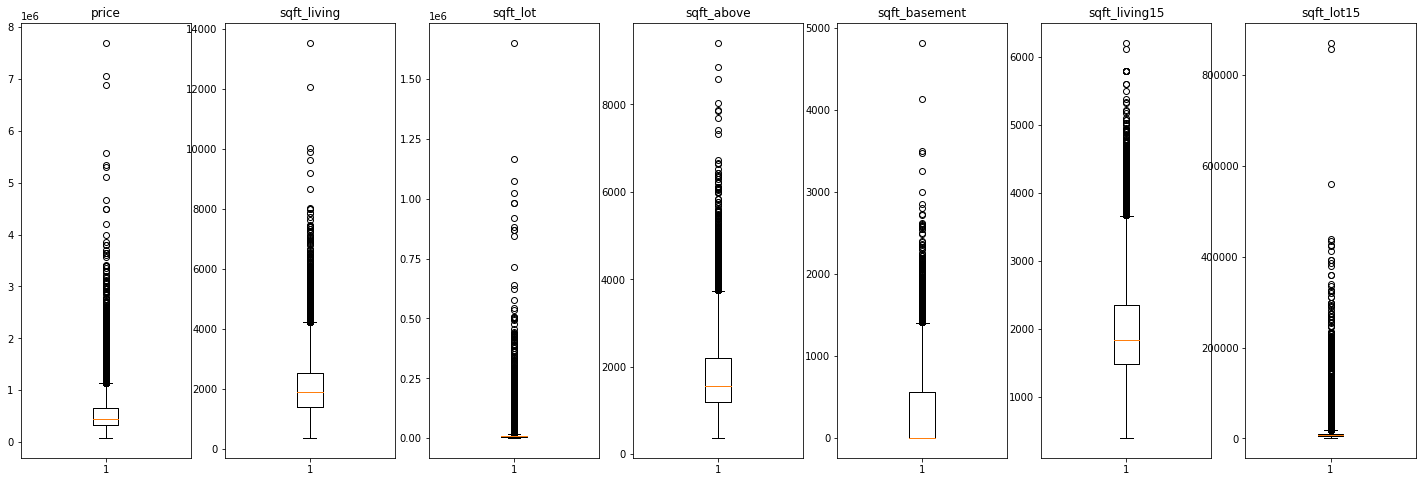

In [90]:
i=0
fig,axes =plt.subplots(nrows =1,ncols =7,figsize=(25,8))
axes =axes.ravel()
for ax in axes:
  ax.boxplot(x=df[continuous_columns[i]])
  ax.set_title(continuous_columns[i])
  i+=1
plt.show() 

In [91]:
df[df['sqft_lot15']>400000]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1719,700000.0,4,1.0,1300,1651359,1.0,0,3,4,6,1300,0,1920,0,98022,47.2313,-122.023,2560,425581
3801,637000.0,4,4.0,3080,118918,2.0,0,0,3,9,3080,0,2008,0,98019,47.7721,-121.924,1830,434728
6691,1998000.0,2,3.0,3900,920423,2.0,0,0,3,12,3900,0,2009,0,98065,47.5371,-121.756,2720,411962
8664,549950.0,3,2.0,2930,266587,2.0,0,0,3,8,2440,490,1995,0,98014,47.6991,-121.947,2700,438213
9714,937500.0,4,4.0,5545,871200,2.0,0,0,3,11,3605,1940,2003,0,98014,47.6760,-121.882,3420,871200
13464,790000.0,3,3.0,2640,432036,2.0,0,3,3,10,2640,0,1996,0,98022,47.1795,-122.036,1500,560617
19156,858000.0,4,4.0,4370,422967,1.0,0,2,4,10,2580,1790,1978,0,98022,47.2332,-122.029,3260,422967
20452,1600000.0,4,6.0,6530,871200,2.0,0,2,3,11,6530,0,2008,0,98014,47.6640,-121.878,1280,858132


In [93]:
df[df['price']>6000000]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3914,7062500.0,5,5.0,10040,37325,2.0,1,2,3,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
7252,7700000.0,6,8.0,12050,27600,3.0,0,3,4,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
9254,6885000.0,6,8.0,9890,31374,2.0,0,4,3,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730


In [94]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [95]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.315673,0.492525,0.701305,0.090245,0.256921,0.267269,0.398083,0.035135,0.667858,0.604759,0.322674,0.055722,0.126729,-0.053429,0.307010,0.022458,0.584973,0.083172
bedrooms,0.315673,1.000000,0.503453,0.594858,0.035223,0.190749,-0.006412,0.084221,0.024451,0.372913,0.496074,0.305318,0.169165,0.017497,-0.162091,-0.014702,0.140963,0.411271,0.033712
bathrooms,0.492525,0.503453,1.000000,0.727681,0.079742,0.470880,0.058430,0.172279,-0.136468,0.666694,0.669368,0.256441,0.544018,0.029004,-0.224185,0.016825,0.239548,0.566302,0.081635
sqft_living,0.701305,0.594858,0.727681,1.000000,0.174062,0.329106,0.104284,0.285363,-0.059981,0.763568,0.876509,0.433569,0.320777,0.055316,-0.200270,0.051500,0.241926,0.757440,0.185019
sqft_lot,0.090245,0.035223,0.079742,0.174062,1.000000,-0.000687,0.021610,0.074910,-0.008879,0.114567,0.184493,0.015706,0.052792,0.007756,-0.129576,-0.085479,0.230181,0.144824,0.718199
floors,0.256921,0.190749,0.470880,0.329106,-0.000687,1.000000,0.026151,0.031624,-0.217724,0.412685,0.492882,-0.239965,0.370334,0.019550,-0.019224,0.065117,0.084797,0.244212,-0.007884
waterfront,0.267269,-0.006412,0.058430,0.104284,0.021610,0.026151,1.000000,0.402160,0.016635,0.082943,0.072326,0.080930,-0.026246,0.092996,0.030304,-0.014251,-0.041969,0.086611,0.030752
view,0.398083,0.084221,0.172279,0.285363,0.074910,0.031624,0.402160,1.000000,0.045730,0.251536,0.167928,0.277589,-0.054028,0.104254,0.084818,0.005960,-0.078358,0.280376,0.072875
condition,0.035135,0.024451,-0.136468,-0.059981,-0.008879,-0.217724,0.016635,0.045730,1.000000,-0.147071,-0.159405,0.173975,-0.361782,-0.060557,0.002952,-0.015000,-0.106196,-0.093807,-0.003226
grade,0.667858,0.372913,0.666694,0.763568,0.114567,0.412685,0.082943,0.251536,-0.147071,1.000000,0.756422,0.167925,0.448792,0.014464,-0.185500,0.113928,0.199300,0.713605,0.120700


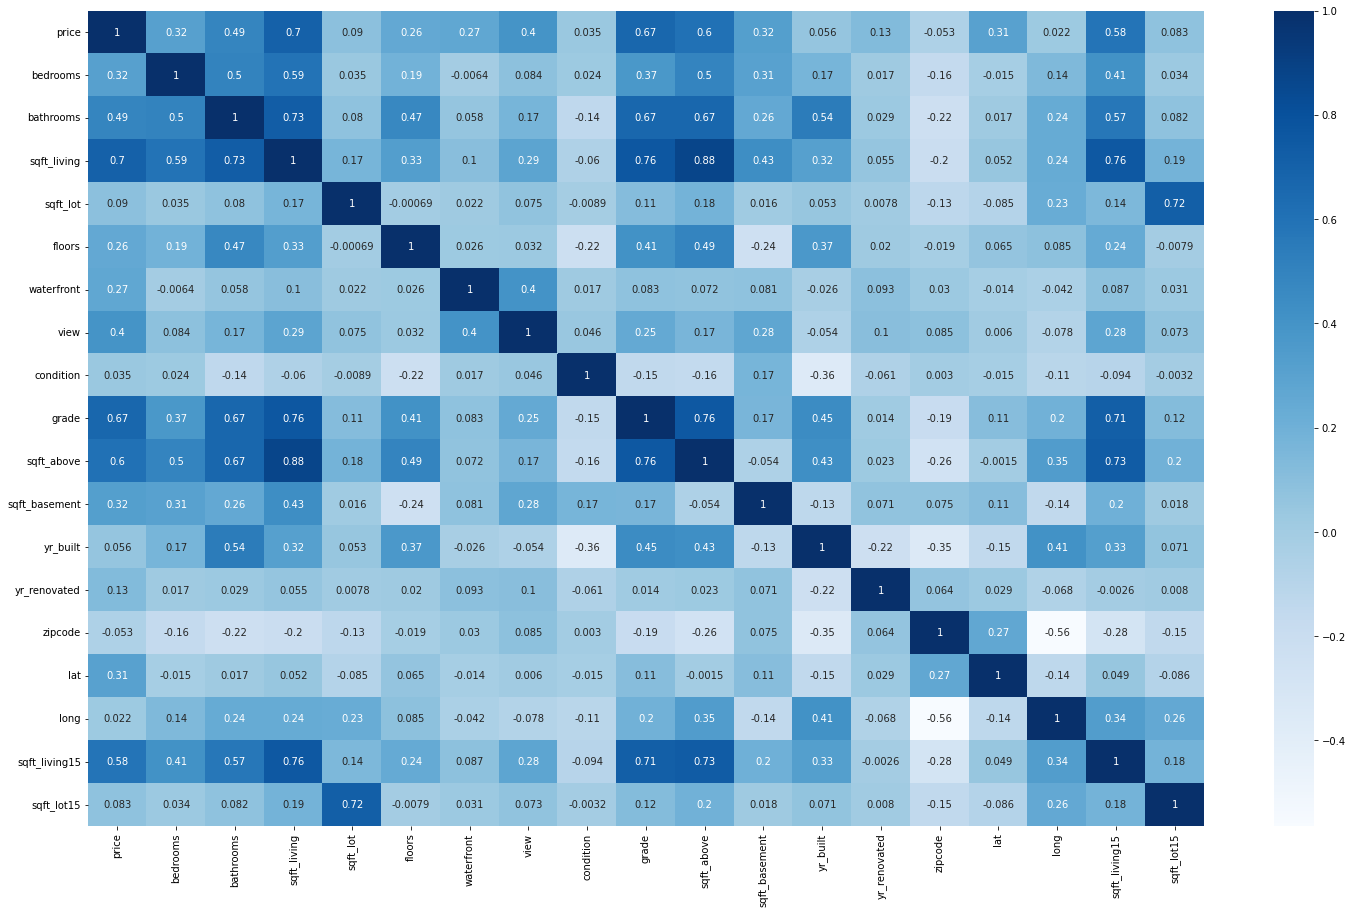

In [103]:
import seaborn as sns
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(),annot =True,cmap='Blues')

In [104]:
# sqft_living is highly correlated with sqft_above 0.88 so dropping sqft_above column
df.drop('sqft_above',axis =1,inplace =True)

#Building machine learning model:
Linear,SVR,Random_Forest_Regressor

In [113]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [109]:
X =df.loc[:,~df.columns.isin(['price'])]
y =df['price']
X.head()


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.0,1180,5650,1.0,0,0,3,7,0,1955,0,98178,47.5112,-122.257,1340,5650
1,3,3.0,2570,7242,2.0,0,0,3,7,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1.0,770,10000,1.0,0,0,3,6,0,1933,0,98028,47.7379,-122.233,2720,8062
3,4,3.0,1960,5000,1.0,0,0,5,7,910,1965,0,98136,47.5208,-122.393,1360,5000
4,3,2.0,1680,8080,1.0,0,0,3,8,0,1987,0,98074,47.6168,-122.045,1800,7503


In [110]:
y.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

In [111]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.3,random_state=2)

In [115]:
pipe =make_pipeline(StandardScaler(),Ridge())
params_={'ridge__alpha':[0.01,0.1,1,10,100]}
grid =GridSearchCV(pipe,cv=5,param_grid=params_)
grid.fit(X_train,y_train)
print(grid.best_estimator_)
print('')
print(f'training accuracy for Ridge model is :{grid.score(X_train,y_train)}')
print(f'testing accuracy for Ridge model is :{grid.score(X_test,y_test)}')

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridge', Ridge(alpha=10))])

training accuracy for Ridge model is :0.7037467311707886
testing accuracy for Ridge model is :0.685313526498364


In [117]:
pipe =make_pipeline(StandardScaler(),RandomForestRegressor())
params_={'randomforestregressor__n_estimators':[100,150,200,250,300]}
grid =GridSearchCV(pipe,cv=5,param_grid=params_)
grid.fit(X_train,y_train)
print(grid.best_estimator_)
print('')
print(f'training accuracy for RandomForest Regressor model is :{grid.score(X_train,y_train)}')
print(f'testing accuracy for Random Forest Regressor model is :{grid.score(X_test,y_test)}')

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(n_estimators=250))])

training accuracy for RandomForest Regressor model is :0.9823214434463272
testing accuracy for Random Forest Regressor model is :0.8771444043129765
